# BANKING DATA ANALYSIS 

# Project Description
In the ever-evolving world of banking and finance, understanding customer behavior and the regional impact of transactions plays a crucial role in decision-making and strategic planning. This project, titled "Analyzing Banking Trends: Customer Transactions and Regional Impact," aims to explore and analyze the vast troves of transaction data to gain valuable insights into customer behavior patterns and their implications on different world regions.

Objective: The primary objective of this project is to delve into customer transactions and identify trends that may impact regional economies and financial systems. By combining data cleaning techniques in Python and utilizing SQL queries on a set of interconnected tables, we aim to gain a comprehensive understanding of how customer transactions vary across different regions and the possible implications on the banking sector.

Data Sources: The project leverages three key tables that provide valuable information for analysis:

1. world_regions table: This table contains data on various world regions and their corresponding codes and names. It serves as a reference to categorize customers based on their regional affiliation.

2. user_nodes table: The user_nodes table holds crucial details about consumers' banking nodes, including their unique consumer IDs, associated region IDs, node IDs, start dates, and end dates. This data enables us to identify the specific banking nodes to which customers are connected and their duration of association.

3. user_transaction table: This table is a comprehensive repository of customer transactions, containing data such as consumer IDs, transaction dates, types of transactions, and transaction amounts. Analyzing this data allows us to uncover patterns in customer spending and financial behaviors
 
All of this dataset was sourced by hicounselor(https://hicounselor.com/projects/analyzing-banking-trends-customer-transactions-and-regional-impact) as part of their materials for individuals to learn and build their portfolio

In [1]:
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
db_params = {
    "host": "localhost",  # or "127.0.0.1" if your database is on the local machine
    "port": 5432,         # Default PostgreSQL port
    "database": "banking_data",
    "user": "postgres",
    "password": "dibie04062000"
}


In [3]:
conn = psycopg2.connect(**db_params)


In [4]:
query = "SELECT * FROM user_nodes_cleaned;"  # Replace "your_table" with the actual table name
user_nodes = pd.read_sql_query(query, conn)


In [5]:
user_nodes

,consumer_id,region_id,node_id,start_date,end_date
0,1,3,4,2020-01-02,2020-01-03
1,2,3,5,2020-01-03,2020-01-17
2,3,5,4,2020-01-27,2020-02-18
3,4,5,4,2020-01-07,2020-01-19
4,5,3,3,2020-01-15,2020-01-23
...,...,...,...,...,...
3495,496,3,4,2020-02-25,2021-12-31
3496,497,5,4,2020-05-27,2021-12-31
3497,498,1,2,2020-04-05,2021-12-31
3498,499,5,1,2020-02-03,2021-12-31


In [6]:
user_nodes.isnull().sum()

consumer_id    0
region_id      0
node_id        0
start_date     0
end_date       0
dtype: int64

In [7]:
query = "SELECT * FROM user_transaction_cleaned;"  # Replace "your_table" with the actual table name
user_transaction = pd.read_sql_query(query, conn)


In [8]:
user_transaction

,consumer_id,transaction_date,transaction_type,transaction_amount
0,312,2020-01-20,deposit,485.0
1,376,2020-01-03,deposit,706.0
2,188,2020-01-13,deposit,601.0
3,138,2020-01-11,deposit,520.0
4,373,2020-01-18,deposit,596.0
...,...,...,...,...
5863,155,2020-01-10,deposit,712.0
5864,398,2020-01-01,deposit,196.0
5865,255,2020-01-14,deposit,563.0
5866,185,2020-01-29,deposit,626.0


In [9]:
user_transaction.isnull().sum()

consumer_id           0
transaction_date      0
transaction_type      0
transaction_amount    0
dtype: int64

In [10]:
query = "SELECT * FROM world_regions;"  # Replace "your_table" with the actual table name
world_regions = pd.read_sql_query(query, conn)

In [11]:
world_regions

,region_code,region_name
0,1,United States
1,2,Europe
2,3,Australia
3,4,Asia
4,5,Africa
5,6,Russia
6,7,China


In [12]:
world_regions.isnull().sum()

region_code    0
region_name    0
dtype: int64

# Exploratory Analysis

Task 1:List all regions along with the number of users assigned to each region.


In [13]:
query ="""SELECT
    wr.region_name AS Region,
    COUNT(DISTINCT un.consumer_id) AS NumberOfUsers
FROM
    world_regions wr
LEFT JOIN
    user_nodes_cleaned un
ON
    wr.region_code = un.region_id
GROUP BY
    wr.region_name
ORDER BY
    NumberOfUsers DESC;

"""

In [14]:
regions=  pd.read_sql_query(query, conn)

In [15]:
regions 

,region,numberofusers
0,United States,110
1,Europe,105
2,Australia,102
3,Asia,95
4,Africa,88
5,China,0
6,Russia,0


In [16]:
#conn.close()

Text(0.5, 1.0, 'Number of Users by Region')

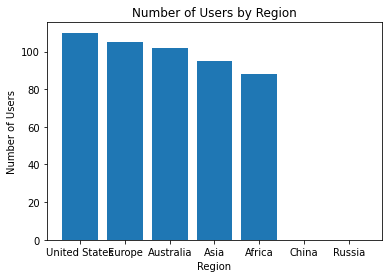

In [17]:
plt.bar(x=regions['region'], height=regions['numberofusers'])
plt.xlabel('Region')
plt.ylabel('Number of Users')
plt.title('Number of Users by Region')


In [18]:
region_name = regions['region']

In [19]:
num_users = regions['numberofusers']

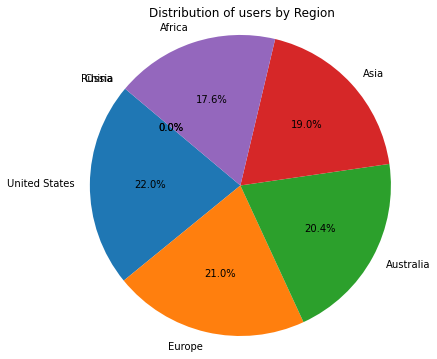

In [20]:
plt.figure(figsize=(6, 6))
plt.pie(num_users, labels=region_name, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of users by Region')
plt.axis('equal')  
plt.show()

Based on my analysis, it is evident that the United States has the highest number of users for this bank, while the lowest number of users can be found in Russia and China, respectively.

Task 2:
Find the user who made the largest deposit amount and the transaction type for that deposit.

In [21]:
query = """SELECT consumer_id,transaction_type,transaction_amount FROM user_transaction_cleaned WHERE transaction_amount = (select MAX(transaction_amount) from user_transaction_cleaned);
"""

In [22]:
largest_amount= pd.read_sql_query(query, conn)

In [23]:
largest_amount

,consumer_id,transaction_type,transaction_amount
0,218,deposit,1000.0
1,219,deposit,1000.0


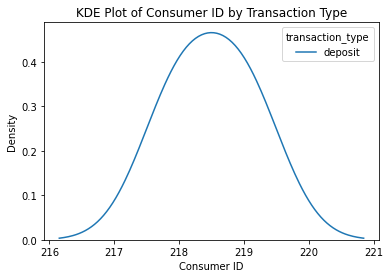

In [24]:
sns.kdeplot(data=largest_amount, x='consumer_id', hue='transaction_type', common_norm=False)
plt.title("KDE Plot of Consumer ID by Transaction Type")
plt.xlabel("Consumer ID")
plt.ylabel("Density")
plt.show()

The customers with the highest single deposit amounts are customer IDs 218 and 219, respectively. They both carried out deposit transactions  of $1000 in their respective currencies, This is the highest single day deposit the bank has recorded in all it regions 

Task 3: 
Calculate the total amount deposited for each user in the "Europe" region.

In [25]:
query ="""SELECT ut.consumer_id AS user, SUM(ut.transaction_amount) AS total_amount_deposited
FROM user_transaction_cleaned ut
JOIN user_nodes_cleaned ur ON ut.consumer_id = ur.consumer_id
JOIN world_regions wr ON wr.region_code = ur.region_id
WHERE wr.region_name = 'Europe'
GROUP BY ut.consumer_id
ORDER BY total_amount_deposited desc;
"""

In [26]:
europe_deposit= pd.read_sql_query(query, conn)

In [27]:
europe_deposit

,user,total_amount_deposited
0,197,87563.0
1,281,86184.0
2,76,77889.0
3,275,77049.0
4,110,76447.0
...,...,...
100,62,8393.0
101,263,8190.0
102,99,8127.0
103,162,8092.0


In [28]:
highset_total_deposit = europe_deposit.head(5)

In [29]:
highset_total_deposit

,user,total_amount_deposited
0,197,87563.0
1,281,86184.0
2,76,77889.0
3,275,77049.0
4,110,76447.0


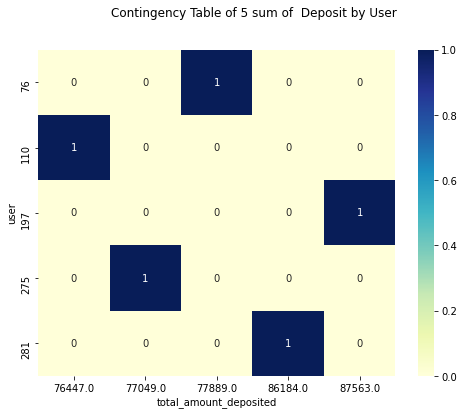

In [30]:
contingency_table = pd.crosstab(highset_total_deposit["user"], highset_total_deposit["total_amount_deposited"])
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Contingency Table of 5 sum of  Deposit by User')
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
fig.savefig('user_transactions_heatmap.jpg', dpi=300)
plt.show()

Customers with user IDs 281, 275, 197, 110, and 76 collectively made the highest number of deposits in the European region over the years 2020 and 2021. Their total deposits amounted to an impressive sum of 404,802, establishing them as the bank's most significant customers.

In [31]:
lowest_total_deposit = europe_deposit.tail(5)

In [32]:
lowest_total_deposit

,user,total_amount_deposited
100,62,8393.0
101,263,8190.0
102,99,8127.0
103,162,8092.0
104,133,6482.0


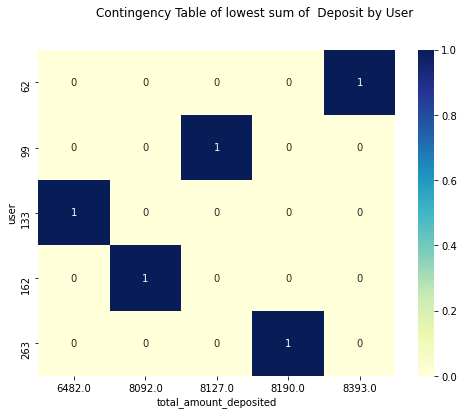

In [33]:
contingency_table = pd.crosstab(lowest_total_deposit["user"], lowest_total_deposit["total_amount_deposited"])
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Contingency Table of lowest sum of  Deposit by User')
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
fig.savefig('user_transactions_heatmap.jpg', dpi=300)
plt.show()

In contrast, customers with user IDs 263, 162, 133, 99, and 62 had the smallest cumulative deposit amounts in the European region over the course of the years 2020 and 2021. Collectively, their total deposits amounted to a considerably lower sum of 39,284. This indicates that they have made fewer and smaller deposits compared to the bank's more substantial customers in the region.

TASK 4:
Calculate the total number of transactions made by each user in the "United States" region.

In [34]:
query = """SELECT ut.consumer_id AS user, COUNT(ut.consumer_id) AS total_transactions
FROM user_transaction_cleaned ut
JOIN user_nodes_cleaned ur ON ut.consumer_id = ur.consumer_id
JOIN world_regions wr ON wr.region_code = ur.region_id
WHERE wr.region_name = 'United States'
GROUP BY ut.consumer_id
ORDER BY total_transactions DESC;
"""

In [35]:
usa_transaction = pd.read_sql_query(query,conn)

In [36]:
usa_transaction

,user,total_transactions
0,69,154
1,284,154
2,37,154
3,161,147
4,462,147
...,...,...
105,114,21
106,79,21
107,84,14
108,15,14


In [37]:
highset_transaction = usa_transaction.head(10)

In [38]:
highset_transaction

,user,total_transactions
0,69,154
1,284,154
2,37,154
3,161,147
4,462,147
5,422,147
6,102,147
7,344,147
8,442,147
9,283,140


In [39]:
lowest_transaction = usa_transaction.tail(10)

In [40]:
lowest_transaction 

,user,total_transactions
100,204,28
101,12,28
102,137,28
103,71,28
104,455,21
105,114,21
106,79,21
107,84,14
108,15,14
109,73,14


In the United States, the highest number of transactions conducted over the years 2020 and 2021 was 154, while the lowest number of transactions recorded was just 14

Task 5:
Find the regions with the highest number of nodes assigned to them.


In [41]:
query = """SELECT wr.region_name, COUNT(un.node_id) AS num_nodes
FROM user_nodes_cleaned un
JOIN world_regions wr ON wr.region_code = un.region_id
GROUP BY wr.region_name
ORDER BY num_nodes DESC;

"""

In [42]:
region_with_highest_nodes = pd.read_sql_query(query,conn)

In [43]:
region_with_highest_nodes

,region_name,num_nodes
0,United States,770
1,Europe,735
2,Australia,714
3,Asia,665
4,Africa,616


In [44]:
region_names = region_with_highest_nodes['region_name']
num_nodes = region_with_highest_nodes['num_nodes']

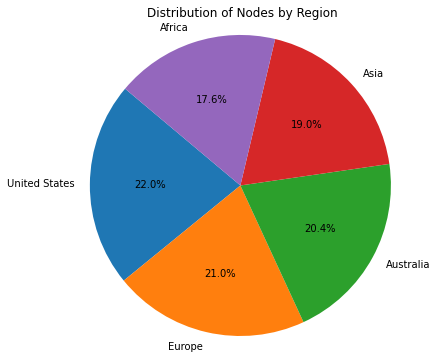

In [45]:
plt.figure(figsize=(6, 6))
plt.pie(num_nodes, labels=region_names, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Nodes by Region')
plt.axis('equal')  
plt.show()

The data shows that the "United States" has the most banking locations, with 770 nodes. Europe is a close second with 735 nodes, and Australia isn't far behind with 714 nodes. Meanwhile, Asia has 665 nodes, and Africa has the fewest, with 616 nodes.

This information helps us understand where the bank's locations are concentrated. It's interesting to note that the United States has the most, indicating that the bank has a strong presence there. This means that customers in the United States have many places to access the bank's services, making it convenient for them. This strategy in the U.S. market shows the bank's commitment to serving customers effectively.

Task 6: Calculate the total amount deposited by each user in each region.

In [46]:
query = """SELECT wr.region_name, SUM(ut.transaction_amount) as total_deposit
FROM user_transaction_cleaned ut
JOIN user_nodes_cleaned un ON ut.consumer_id = un.consumer_id
JOIN world_regions wr ON un.region_id = wr.region_code
WHERE ut.transaction_type = 'deposit'
GROUP BY wr.region_name
ORDER BY wr.region_name DESC;
"""


In [47]:
deposit_per_region = pd.read_sql_query(query,conn)

In [48]:
deposit_per_region

,region_name,total_deposit
0,United States,2078069.0
1,Europe,2120503.0
2,Australia,1851703.0
3,Asia,1853110.0
4,Africa,1610791.0


Text(0.5, 1.0, 'total_deposit by Region')

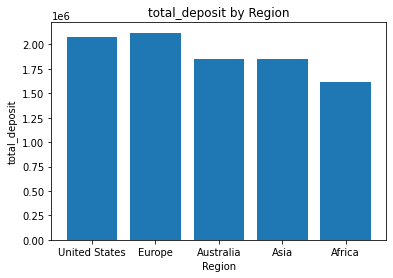

In [49]:
plt.bar(x=deposit_per_region['region_name'], height=deposit_per_region['total_deposit'])
plt.xlabel('Region')
plt.ylabel('total_deposit')
plt.title('total_deposit by Region')


This results show the total deposit amounts for different regions based on "deposit" transactions:

United States: Customers in the United States have collectively deposited $2,078,069.0, reflecting a substantial presence and activity in this region.

Europe: Europe follows closely with a total deposit of $2,120,503.0, indicating a strong customer base and banking activity.

Australia: The bank has received deposits totaling $1,851,703.0 from customers in Australia, demonstrating a solid financial presence in this region.

Asia: Asia shows a total deposit of $1,853,110.0, highlighting significant banking engagement.

Africa: Customers in Africa have deposited $1,610,791.0, representing a notable but slightly lower deposit total.


These figures provide valuable insights for the bank in multiple critical areas. Firstly, they shed light on regional performance by revealing how each region contributes to the bank's overall deposit portfolio, enabling the assessment of regional success. Secondly, the data plays a pivotal role in resource allocation, guiding the bank in deciding where to focus its efforts to attract more deposits effectively. Furthermore, it informs strategic decisions, like whether to grow in some areas, combine efforts in others, or make special products or services tailored to the unique needs of different regions. Lastly, the information prompts a closer examination of customer behavior and preferences across various regions, ultimately leading to the provision of more tailored and customer-centric services.

Task 7: Retrieve the total number of all  transactions for each region.

In [50]:
query = """SELECT COUNT(ut.consumer_id) as num_transactions, wr.region_name
FROM user_transaction_cleaned ut
JOIN user_nodes_cleaned un ON ut.consumer_id = un.consumer_id
JOIN world_regions wr ON un.region_id = wr.region_code
GROUP BY wr.region_name;
"""

In [51]:
transactions_per_region = pd.read_sql_query(query,conn)

In [52]:
transactions_per_region

,num_transactions,region_name
0,9107,United States
1,8414,Australia
2,6797,Africa
3,7952,Asia
4,8806,Europe


Text(0.5, 1.0, 'Number of transaction by Region')

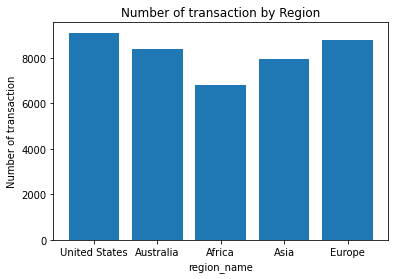

In [53]:
plt.bar(x=transactions_per_region['region_name'], height=transactions_per_region['num_transactions'])
plt.xlabel('region_name')
plt.ylabel('Number of transaction')
plt.title('Number of transaction by Region')


The data provides a broad view of transactions across different regions, including withdrawals, deposits, and purchases. Each region has its own way of using these transaction types:

United States: With 9,107 transactions, it's clear that people in the U.S. use a variety of financial services, like withdrawing, depositing, and purchasing. This shows that the U.S. has a diverse banking landscape, catering to different customer needs.

Australia: Australia, with 8,414 transactions, also has a thriving financial environment. Here, people rely on various transaction types to meet their financial requirements, indicating a flexible banking system.

Africa: Africa, recording 6,797 transactions, highlights the importance of different transaction types for its unique financial needs. This underscores the role of accessible banking services for various purposes.

Asia: In Asia, where there are 7,952 transactions, people engage in a wide range of financial activities. This emphasizes the usefulness of different transaction types to meet diverse customer demands.

Europe: Europe, with 8,806 transactions, caters to various financial needs, showcasing the adaptability of different transaction types to address a range of customer requests.

Task 8: How many consumers are allocated to each region?










In [54]:
query = """SELECT wr.region_name, wr.region_code, Count( un.consumer_id)
FROM user_nodes_cleaned as un
LEFT JOIN world_regions as wr ON un.region_id = wr.region_code
GROUP BY wr.region_name, wr.region_code;

"""

In [55]:
consumers_per_region = pd.read_sql(query,conn)

In [56]:
consumers_per_region

,region_name,region_code,count
0,Africa,5,616
1,United States,1,770
2,Asia,4,665
3,Australia,3,714
4,Europe,2,735


In [57]:
region_names = consumers_per_region['region_name']
region_codes = consumers_per_region['region_code']
count = consumers_per_region['count']

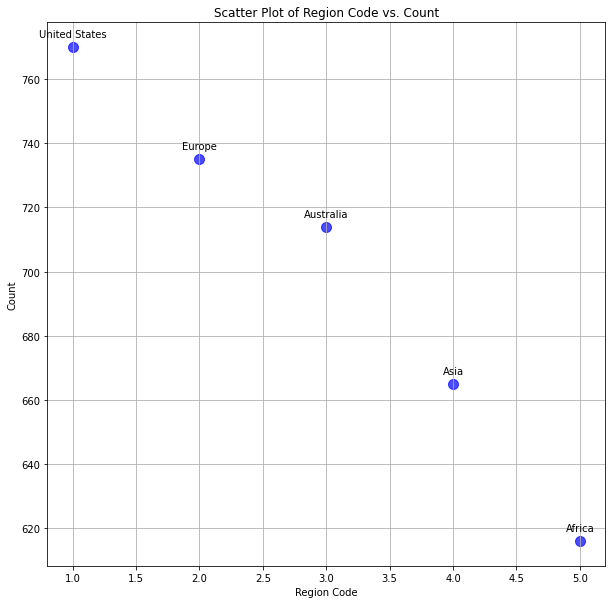

In [58]:
plt.figure(figsize=(10, 10))
plt.scatter(region_codes, count, c='blue', marker='o', s=100, alpha=0.7)
plt.title('Scatter Plot of Region Code vs. Count')
plt.xlabel('Region Code')
plt.ylabel('Count')
for i in range(len(region_names)):
    plt.annotate(region_names[i], (region_codes[i], count[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.grid(True)
plt.show()

This results  provide a clear picture of the number of customers allocated to each region, which is crucial for the bank's understanding of its customer distribution. When we relate this visuals to the analysis of banking nodes we conducted earlier, it becomes evident that regions with a higher count of consumers often coincide with regions that had a more extensive network of banking nodes. For instance, the United States, with the highest count of consumers at 770, aligns with the earlier findings of an extensive banking node network, highlighting the strong presence and customer activity in this region. Similarly, Europe's 735 consumers correlate with the significant number of banking nodes, indicating a robust financial environment with diverse services. The number of consumers in Australia, Asia, and Africa also corresponds with the banking activity we observed in those regions. In essence, this data reaffirms the importance of adapting banking services to meet the specific needs of each region's customer base, as reflected in both the number of consumers and the presence of banking nodes.







Task 9: What is the unique count and total amount for each transaction type?

In [59]:
query = """SELECT COUNT(DISTINCT consumer_id), SUM(transaction_amount), transaction_type
FROM user_transaction_cleaned
GROUP BY transaction_type
ORDER BY SUM(transaction_amount);
"""

In [60]:
amount_per_transactiontype = pd.read_sql_query(query,conn)

In [61]:
amount_per_transactiontype

,count,sum,transaction_type
0,439,793003.0,withdrawal
1,448,806537.0,purchase
2,500,1359168.0,deposit


In [62]:
sum_amount = amount_per_transactiontype['sum']
transaction_type = amount_per_transactiontype['transaction_type']
count =amount_per_transactiontype['count']

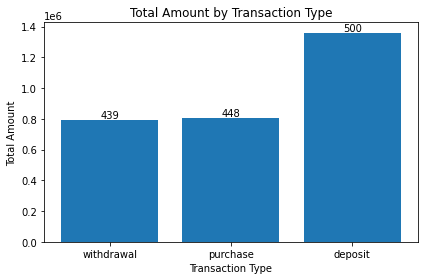

In [63]:
plt.bar(transaction_type, sum_amount)
for i, v in enumerate(count):
    plt.text(i, sum_amount[i], str(v), ha='center', va='bottom')
plt.xlabel("Transaction Type")
plt.ylabel("Total Amount")
plt.title("Total Amount by Transaction Type")
plt.tight_layout()
plt.show()

this  results  show the unique count and total amount for each transaction type across all regions:

Withdrawals: There were a total of 439 unique instances of withdrawal transactions, amounting to $793,003.0. This suggests that withdrawals are a commonly performed transaction type. For the bank, it indicates that customers frequently need access to their funds, and it's crucial to maintain sufficient liquidity in the branches or ATMs to accommodate these requests. It also highlights that customers rely on the bank for cash access.

Purchases: There were 448 unique instances of purchase transactions, totaling $806,537.0. This signifies that purchases are also a frequently performed transaction type. For the bank, it implies a significant number of customers using their accounts or cards for buying goods and services, which may result in transaction fees or interchange revenue for the bank.

Deposits: There were 500 unique instances of deposit transactions, with a total amount of $1,359,168.0. This data reveals that deposits are a common transaction type, indicating that customers are actively putting money into their accounts. For the bank, this reflects a stable influx of funds, potentially available for lending or investment

Task 10: What are the average deposit counts and amounts for each transaction type ('deposit') across all customers, grouped by transaction type?




In [64]:
query ="""
WITH DepositSummary AS (
    SELECT
        transaction_type,
        consumer_id,
        COUNT(transaction_type) AS TotalDepositCounts,
        SUM(transaction_amount) AS TotalDepositAmount
    FROM user_transaction_cleaned
    WHERE transaction_type = 'deposit'
    GROUP BY transaction_type, consumer_id
)

SELECT
    transaction_type,
    ROUND(AVG(TotalDepositCounts), 0) AS AvgDepositCounts,
    ROUND(AVG(TotalDepositAmount), 0) AS AvgDepositAmount
FROM DepositSummary
GROUP BY transaction_type;
"""

In [65]:
deposit_summary = pd.read_sql_query(query,conn)

In [66]:
deposit_summary

,transaction_type,avgdepositcounts,avgdepositamount
0,deposit,5.0,2718.0


For every region of the bank, on average, each customer makes about 5 deposit transactions, and the average amount deposited in each of these transactions is around $2,718. This signifies that customers regularly use the deposit services, contributing substantial amounts to their accounts with each transaction. It's a positive sign, reflecting trust in the bank's services and the availability of substantial funds for the bank's operations.

# we want to know if they are  customers who have churned, defined as those who have not made any transactions at all be it deposit, withdrawal or purchase  in any region as of the end of 2020 and are labeled as "churned." Churned customers are those with a last transaction date before January 1, 2021.

In [67]:
query = """SELECT
    un.consumer_id,
    un.start_date AS customer_start_date,
    un.end_date AS customer_end_date,
    MAX(ut.transaction_date) AS last_transaction_date
FROM user_nodes_cleaned un
LEFT JOIN user_transaction_cleaned ut ON un.consumer_id = ut.consumer_id
GROUP BY un.consumer_id, un.start_date, un.end_date
HAVING
    (un.end_date IS NOT NULL AND MAX(ut.transaction_date) < '2021-01-01')
    OR (un.end_date IS NULL AND MAX(ut.transaction_date) < '2021-01-01');

"""

In [68]:
churned_customers = pd.read_sql_query(query,conn)

In [69]:
churned_customers

,consumer_id,customer_start_date,customer_end_date,last_transaction_date
0,305,2020-03-06,2020-03-25,2020-03-22
1,141,2020-01-15,2020-01-29,2020-04-04
2,1,2020-01-29,2020-02-18,2020-03-19
3,145,2020-03-20,2020-04-03,2020-03-24
4,464,2020-03-24,2020-04-10,2020-04-11
...,...,...,...,...
3495,219,2020-03-22,2020-04-07,2020-04-03
3496,463,2020-03-12,2020-04-09,2020-04-16
3497,340,2020-02-18,2020-03-06,2020-04-01
3498,119,2020-01-17,2020-02-06,2020-04-10


my data shows that a total of a total of 3,499 people have churned

# MACHINE LEARNING

My machine learning model aims to predict customer churn in this banking dataset. my definition of customer Customer churn refers to customers who have not made any transactions as of the end 0f 2020 into the fresh year of 2021 and are labelled as "churned." The model aims to answer the question of which customers are likely to churn based on various features such as transaction history, region, and other relevant information. The bank can proactively retain those customers by identifying potential churners in advance.

In [70]:
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [71]:
query = """SELECT un.*, ut.*, wr.*
FROM user_nodes_cleaned un
LEFT JOIN user_transaction_cleaned ut ON un.consumer_id = ut.consumer_id
LEFT JOIN world_regions wr ON un.region_id = wr.region_code;

"""

In [72]:
data = pd.read_sql_query(query,conn)

In [73]:
data

,consumer_id,region_id,node_id,start_date,end_date,consumer_id,transaction_date,transaction_type,transaction_amount,region_code,region_name
0,312,5,2,2020-04-24,2021-12-31,312,2020-01-20,deposit,485.0,5,Africa
1,312,5,4,2020-04-01,2020-04-23,312,2020-01-20,deposit,485.0,5,Africa
2,312,5,3,2020-03-16,2020-03-31,312,2020-01-20,deposit,485.0,5,Africa
3,312,5,4,2020-02-21,2020-03-15,312,2020-01-20,deposit,485.0,5,Africa
4,312,5,5,2020-02-09,2020-02-20,312,2020-01-20,deposit,485.0,5,Africa
...,...,...,...,...,...,...,...,...,...,...,...
41071,309,5,5,2020-03-03,2020-03-11,309,2020-01-13,deposit,995.0,5,Africa
41072,309,5,4,2020-02-28,2020-03-02,309,2020-01-13,deposit,995.0,5,Africa
41073,309,5,1,2020-02-27,2020-02-27,309,2020-01-13,deposit,995.0,5,Africa
41074,309,5,1,2020-02-07,2020-02-26,309,2020-01-13,deposit,995.0,5,Africa


In [74]:
data['end_date'] = pd.to_datetime(data['end_date'])
data['start_date'] = pd.to_datetime(data['start_date'])
data['transaction_date'] = pd.to_datetime(data['start_date'])

In [75]:
end_date = datetime(2020, 12, 31)  
start_date = datetime(2020, 1, 1)
transaction_date = datetime(2020,12,31)

Customers with a defined end date (i.e., un.end_date IS NOT NULL) and whose end date falls on or before December 31, 2020, are classified as "churned." This indicates that their last transaction date occurred on or before December 31, 2020.

Likewise, customers without a defined end date (i.e., un.end_date IS NULL) and whose last transaction date is on or before December 31, 2020, are also categorized as "churned." In essence, these customers ceased transacting with the bank by the conclusion of 2020, and they were not retained as active customers in 2021.

In [76]:
from datetime import datetime

def label_churn(row):
    if pd.isnull(row['end_date']):
        return 'churned'  # No end date, consider churned
    if row['end_date'] <= end_date and pd.to_datetime(row['transaction_date']) <= transaction_date:
        return 'active'  # Last transaction date is within the dataset period
    return 'churned'  # Customer is churned based on the dataset period

In [77]:
data['churn'] = data.apply(label_churn, axis=1)

In [78]:
data

,consumer_id,region_id,node_id,start_date,end_date,consumer_id,transaction_date,transaction_type,transaction_amount,region_code,region_name,churn
0,312,5,2,2020-04-24,2021-12-31,312,2020-04-24,deposit,485.0,5,Africa,churned
1,312,5,4,2020-04-01,2020-04-23,312,2020-04-01,deposit,485.0,5,Africa,active
2,312,5,3,2020-03-16,2020-03-31,312,2020-03-16,deposit,485.0,5,Africa,active
3,312,5,4,2020-02-21,2020-03-15,312,2020-02-21,deposit,485.0,5,Africa,active
4,312,5,5,2020-02-09,2020-02-20,312,2020-02-09,deposit,485.0,5,Africa,active
...,...,...,...,...,...,...,...,...,...,...,...,...
41071,309,5,5,2020-03-03,2020-03-11,309,2020-03-03,deposit,995.0,5,Africa,active
41072,309,5,4,2020-02-28,2020-03-02,309,2020-02-28,deposit,995.0,5,Africa,active
41073,309,5,1,2020-02-27,2020-02-27,309,2020-02-27,deposit,995.0,5,Africa,active
41074,309,5,1,2020-02-07,2020-02-26,309,2020-02-07,deposit,995.0,5,Africa,active


In [79]:
data.isnull().sum()

consumer_id           0
region_id             0
node_id               0
start_date            0
end_date              0
consumer_id           0
transaction_date      0
transaction_type      0
transaction_amount    0
region_code           0
region_name           0
churn                 0
dtype: int64

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41076 entries, 0 to 41075
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   consumer_id         41076 non-null  int64         
 1   region_id           41076 non-null  int64         
 2   node_id             41076 non-null  int64         
 3   start_date          41076 non-null  datetime64[ns]
 4   end_date            41076 non-null  datetime64[ns]
 5   consumer_id         41076 non-null  int64         
 6   transaction_date    41076 non-null  datetime64[ns]
 7   transaction_type    41076 non-null  object        
 8   transaction_amount  41076 non-null  float64       
 9   region_code         41076 non-null  int64         
 10  region_name         41076 non-null  object        
 11  churn               41076 non-null  object        
dtypes: datetime64[ns](3), float64(1), int64(5), object(3)
memory usage: 3.8+ MB


In [81]:
data['churn'].value_counts()

active     35212
churned     5864
Name: churn, dtype: int64

In [82]:
data['churn'].value_counts(normalize=True)


active     0.85724
churned    0.14276
Name: churn, dtype: float64

The bank entered 2021 with approximately 85.72% of its customers retained, while approximately 14.28% of customers had churned by the end of 2020

In [83]:
# # Import necessary libraries
# import pandas as pd
# from datetime import datetime, timedelta
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix

# # Load data from your three tables (you should adapt this part according to your data source)
# user_nodes_data = pd.read_csv('user_nodes.csv')
# user_transaction_data = pd.read_csv('user_transaction.csv')
# world_regions_data = pd.read_csv('world_regions.csv')

# # Define churn based on a time-based threshold (e.g., 3 months of inactivity)
# end_date = datetime.strptime('3/1/20', '%d/%m/%y')
# cutoff_date = end_date - timedelta(days=90)

# # Merge data from user_nodes and user_transaction based on common columns
# merged_data = user_nodes_data.merge(user_transaction_data, on='consumer_id', how='left')

# # Create a target variable for churn based on the time threshold
# merged_data['churn'] = (merged_data['transaction_date'] < cutoff_date).astype(int)

# # Feature engineering: You can add more features based on your data

# # Split data into training and testing sets
# X = merged_data.drop(columns=['churn'])
# y = merged_data['churn']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train a predictive model (e.g., Random Forest)
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Print evaluation metrics
# print(f'Accuracy: {accuracy}')
# print(f'Confusion Matrix:\n{conf_matrix}')
